In [1]:
#Step 1. Import
import numpy as np
import matplotlib.pyplot as plt

from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.layers import Conv2D, MaxPool2D, Flatten
from keras import utils as np_utils

Using TensorFlow backend.


In [2]:
nb_classes = 10
#Step 2. Load Data From Web
(x_train, y_train), (x_test, y_test) = mnist.load_data()
img_channel = 1

In [3]:
print(type(x_train))
print("x_train shape", x_train.shape)
print("y_train shape", y_train.shape)

<class 'numpy.ndarray'>
x_train shape (60000, 28, 28)
y_train shape (60000,)


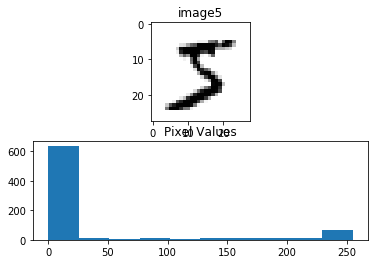

In [4]:
#Step 3. Show Data
fig = plt.figure()
plt.subplot(2,1,1)
plt.imshow(x_train[0], cmap="binary", interpolation="none")
plt.title("image" + str(y_train[0]))
plt.subplot(2,1,2)
plt.hist(x_train[0].reshape(784))
plt.title("Pixel Values")
plt.show()

In [5]:
#Step 4. Prepare Training
img_size_x, img_size_y = 28, 28
x_train = x_train.reshape(x_train.shape[0], img_size_x, img_size_y, img_channel)
x_test = x_test.reshape(x_test.shape[0], img_size_x, img_size_y, img_channel)
input_shape = (img_size_x, img_size_y, img_channel)
x_train = x_train.astype("float32")
x_test = x_test.astype("float32")
x_train /= 255
x_test /= 255

In [6]:
#Step 5. One hot encoding
y_train = np_utils.to_categorical(y_train,nb_classes)
y_test = np_utils.to_categorical(y_test,nb_classes)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28, 1)
(60000, 10)
(10000, 28, 28, 1)
(10000, 10)


In [7]:
#Step 6. Create model
model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), activation="relu", input_shape=input_shape))
model.add(Conv2D(64, kernel_size=(3,3), activation="relu"))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation="softmax"))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
__________

In [8]:
#Step 7. Compile
model.compile(loss='categorical_crossentropy',optimizer='adadelta',metrics=['accuracy'])

In [9]:
#Step 8. Training
history = model.fit(x_train, y_train, batch_size=128, epochs=10, verbose=1, validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 71s 1ms/step - loss: 0.2608 - acc: 0.9201 - val_loss: 0.0597 - val_acc: 0.9801
Epoch 2/10
60000/60000 [==============================] - 71s 1ms/step - loss: 0.0864 - acc: 0.9748 - val_loss: 0.0404 - val_acc: 0.9865
Epoch 3/10
60000/60000 [==============================] - 72s 1ms/step - loss: 0.0642 - acc: 0.9807 - val_loss: 0.0352 - val_acc: 0.9875
Epoch 4/10
60000/60000 [==============================] - 73s 1ms/step - loss: 0.0539 - acc: 0.9841 - val_loss: 0.0330 - val_acc: 0.9893
Epoch 5/10
60000/60000 [==============================] - 73s 1ms/step - loss: 0.0472 - acc: 0.9858 - val_loss: 0.0313 - val_acc: 0.9903
Epoch 6/10
60000/60000 [==============================] - 72s 1ms/step - loss: 0.0426 - acc: 0.9873 - val_loss: 0.0271 - val_acc: 0.9911
Epoch 7/10
60000/60000 [==============================] - 72s 1ms/step - loss: 0.0377 - acc: 0.9885 - val_loss: 0.0267 - val_acc